In [ ]:
import cv2
import math
import numpy as np
import random as rng
from matplotlib import pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
import urllib.request
%matplotlib inline

In [ ]:
image_path= "xray.jpg"

min: -0.06165376921584598 max: 0.04718342909248563
min: -0.06468595856592674 max: 0.047672619436366415
min: -0.06804390060636156 max: 0.03477623731197843
min: -0.04907389158046144 max: 0.03456984978746075


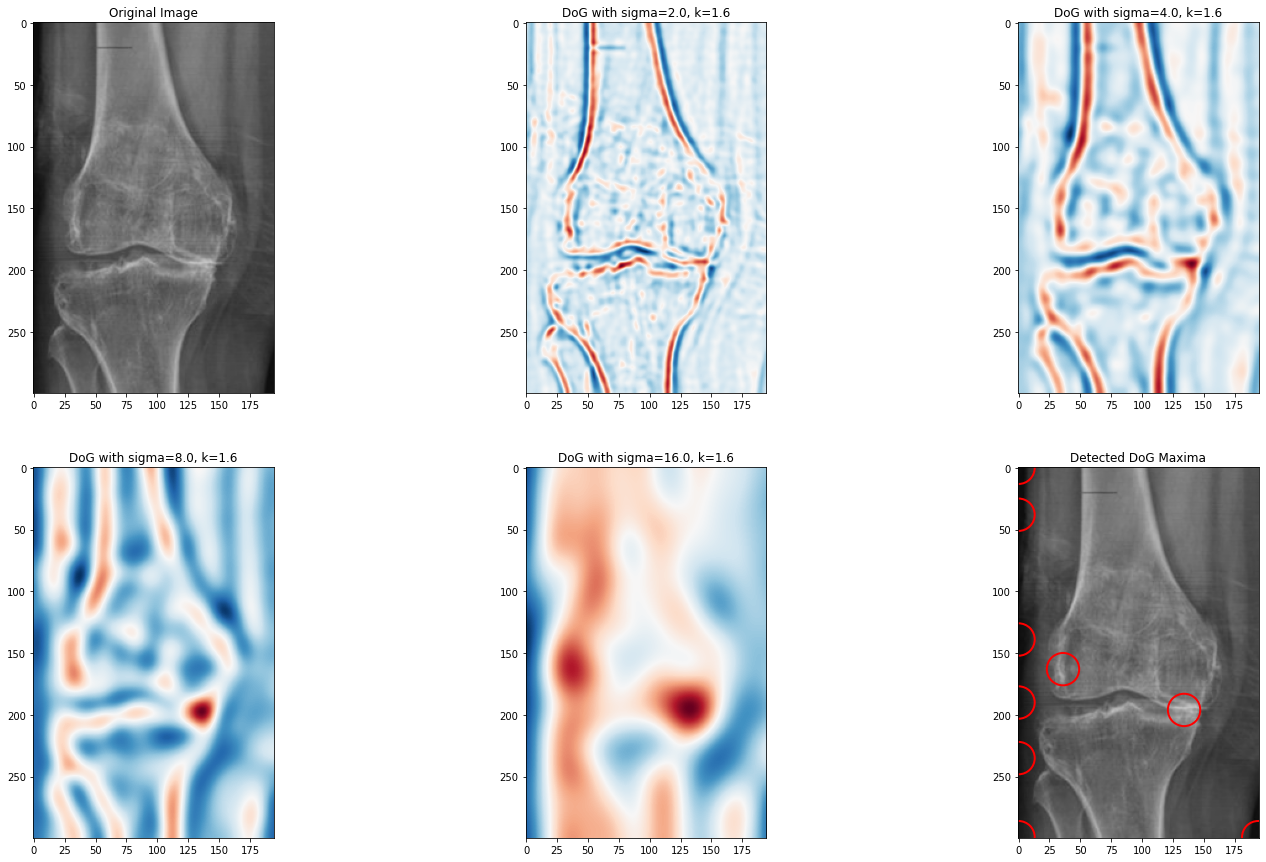

In [ ]:
from skimage import io, feature, color, filters, img_as_float
from matplotlib import pyplot as plt

raw_img = io.imread(image_path)
original_image = img_as_float(raw_img)[900:1200, 155:350]
img = color.rgb2gray(original_image)

k = 1.6

plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
plt.imshow(original_image)
plt.title('Original Image')

for idx,sigma in enumerate([2.0, 4.0, 8.0, 16.0]):
    s1 = filters.gaussian(img, k*sigma)
    s2 = filters.gaussian(img, sigma)

    # multiply by sigma to get scale invariance
    dog = s1 - s2
    plt.subplot(2,3,idx+2)
    print("min: {} max: {}".format(dog.min(), dog.max()))
    plt.imshow(dog, cmap='RdBu')
    plt.title('DoG with sigma=' + str(sigma) + ', k=' + str(k))

ax = plt.subplot(2, 3, 6)
blobs_dog = [(x[0], x[1], x[2]) for x in feature.blob_dog(img, min_sigma=2, max_sigma=16, threshold=0.5, overlap=1.0)]
# skimage has a bug in my version where only maxima were returned by the above
blobs_dog += [(x[0], x[1], x[2]) for x in feature.blob_dog(-img,  min_sigma=2, max_sigma=16, threshold=0.5, overlap=1.0)]

#remove duplicates
blobs_dog = set(blobs_dog)

img_blobs = color.gray2rgb(img)
for blob in blobs_dog:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
    ax.add_patch(c)
plt.imshow(img_blobs)
plt.title('Detected DoG Maxima')

plt.show()

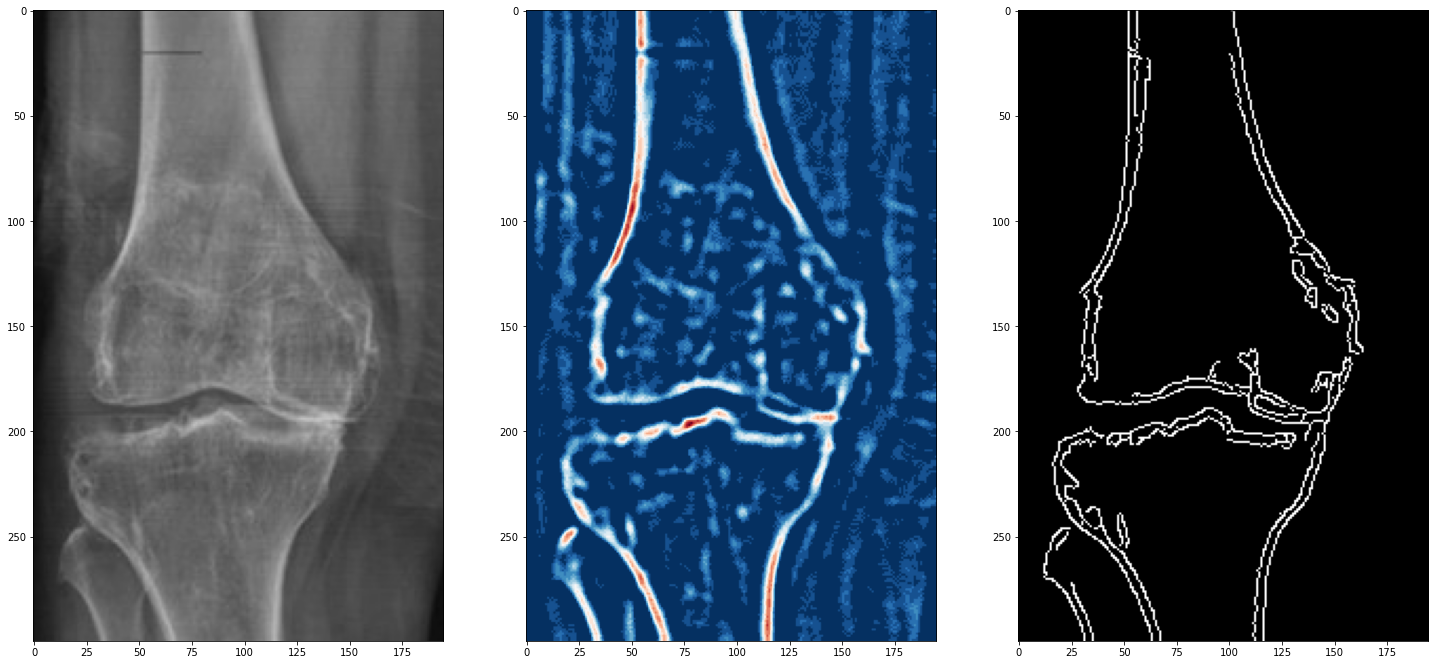

In [ ]:
inputImage = cv2.imread(image_path)[900:1200, 155:350]
inputImageGray = cv2.cvtColor(inputImage,cv2.COLOR_BGR2GRAY)
inputImage = cv2.cvtColor(inputImage,cv2.COLOR_BGR2RGB)

sigma = 2
k = 1.6
s1 = cv2.GaussianBlur(inputImageGray, ksize=(0,0), sigmaX=k*sigma)
s2 = cv2.GaussianBlur(inputImageGray, ksize=(0,0), 
                      sigmaX=sigma
                      )
inputImageGray = cv2.subtract(s2, s1)

# reduce noise
# inputImageGray = cv2.medianBlur(inputImageGray, ksize=7)

# edge detection w/ Canny operator
inputImageEdge = cv2.Canny(inputImageGray, 0, 25, 25)
# inputImageEdge = cv2.Canny(inputImageGray, 0, 85, 80)

# expand discontinuous contour line w/ dilation and erosion
# size = (4, 4)
# shape = cv2.MORPH_RECT
# kernel = cv2.getStructuringElement(shape, size)
# inputImageEdge = cv2.dilate(inputImageEdge,kernel)

# size = (2, 2)
# shape = cv2.MORPH_RECT
# kernel = cv2.getStructuringElement(shape, size)
# inputImageEdge = cv2.erode(inputImageEdge,kernel)

plt.figure(figsize=(25,15))
plt.subplot(1,3,1)
plt.imshow(inputImage)
plt.subplot(1,3,2)
plt.imshow(inputImageGray, cmap="RdBu_r")
plt.subplot(1,3,3)
plt.imshow(inputImageEdge, cmap="gray")

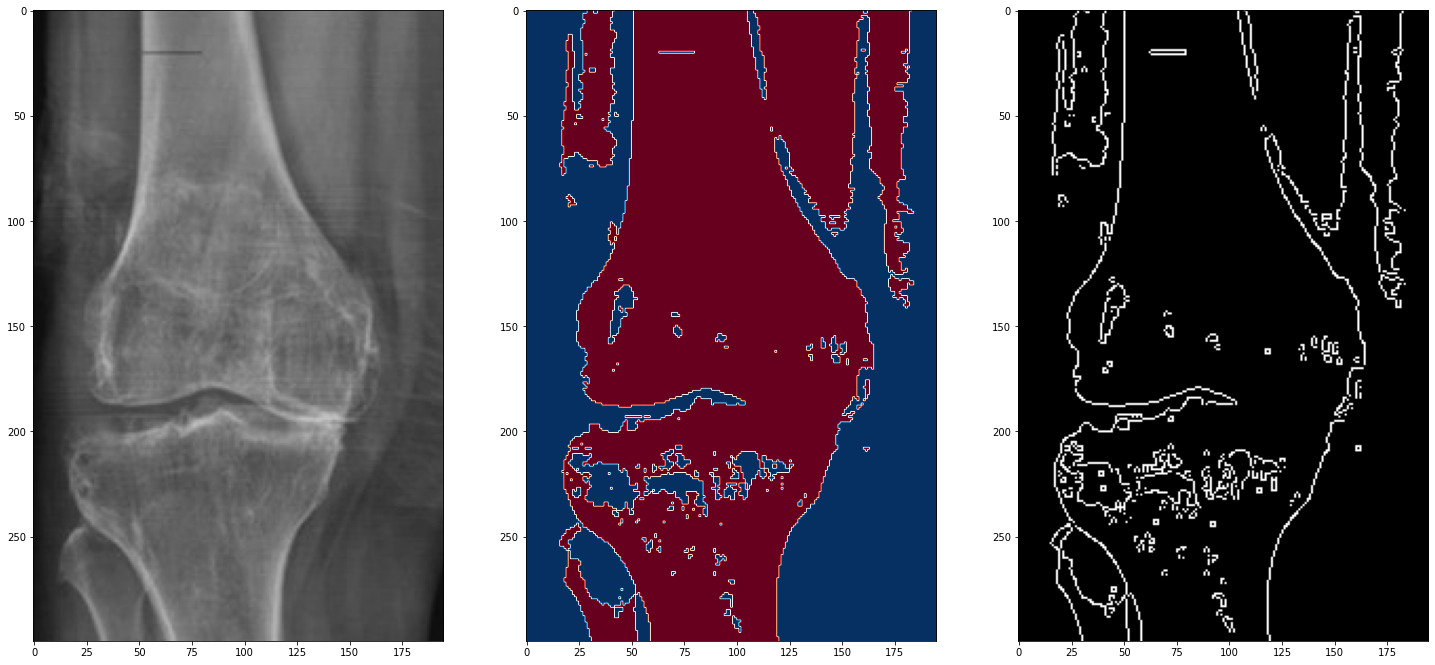

In [ ]:
inputImage = cv2.imread(image_path)[900:1200, 155:350]
inputImageGray = cv2.cvtColor(inputImage,cv2.COLOR_BGR2GRAY)
inputImage = cv2.cvtColor(inputImage,cv2.COLOR_BGR2RGB)

ret2,inputImageGray = cv2.threshold(inputImageGray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# reduce noise
# inputImageGray = cv2.medianBlur(inputImageGray, ksize=7)

# edge detection w/ Canny operator
inputImageEdge = cv2.Canny(inputImageGray, 0, 25, 25)
inputImageEdge = cv2.Canny(inputImageGray, 0, 85, 80)

# expand discontinuous contour line w/ dilation and erosion
# size = (4, 4)
# shape = cv2.MORPH_RECT
# kernel = cv2.getStructuringElement(shape, size)
# inputImageEdge = cv2.dilate(inputImageEdge,kernel)

# size = (2, 2)
# shape = cv2.MORPH_RECT
# kernel = cv2.getStructuringElement(shape, size)
# inputImageEdge = cv2.erode(inputImageEdge,kernel)

plt.figure(figsize=(25,15))
plt.subplot(1,3,1)
plt.imshow(inputImage)
plt.subplot(1,3,2)
plt.imshow(inputImageGray, cmap="RdBu_r")
plt.subplot(1,3,3)
plt.imshow(inputImageEdge, cmap="gray")

# Idea
- crop เฉพาะ roi เพื่อหาแต่ละจุด
- https://stackoverflow.com/questions/49743649/python-calculating-the-angle-between-two-bones-in-an-x-ray